# US H1-B Visa Analysis

You are a Data Scientist conducting a research of how US companies hire and apply for working visa for
foreign workers. Your objective is to find interesting patterns in given data. You have been supplied with three real datasets:
- The result of 2016 applications for H1B visas;
- NAICS codes;
- US States;

Your analysis must be able to address the following questions:  
1) What are the top 10 occupations for H1B visas with certified status?  
2) Which company hires more data scientists?  
3) What is the average salary for data scientists? How it is compared to the mean of applications?  
4) Which state has the higher deny proportionally to application. And proportionally to the population?  
5) What industries are in the top 5 percentile of applications?  
6) Does the month of the application play any role in to denied process? What about decision dates?  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,8

In [2]:
states = pd.read_csv('/Users/Rudra/Documents/Work/Projects/SuperDataScience Workshops/Python/US H1-B Visa Analysis/states population.csv')
states.head()

,State abbreviation,State,Population estimate
0,CA,California,39250017
1,TX,Texas,27862596
2,FL,Florida,20612439
3,NY,New York,19745289
4,PA,Pennsylvania,12802503


In [3]:
states.columns = ['EMPLOYER_STATE','State','Population_Est']
states.head(2)

,EMPLOYER_STATE,State,Population_Est
0,CA,California,39250017
1,TX,Texas,27862596


In [4]:
naics = pd.read_csv('/Users/Rudra/Documents/Work/Projects/SuperDataScience Workshops/Python/US H1-B Visa Analysis/naics codes.csv', encoding = 'latin1')
naics.head()

,NAICS Code,NAICS Title,Unnamed: 2
0,11,"Agriculture, Forestry, Fishing and Hunting",NaN
1,21,"Mining, Quarrying, and Oil and Gas Extraction",NaN
2,22,Utilities,NaN
3,23,Construction,NaN
4,42,Wholesale Trade,NaN


In [5]:
naics = naics[['NAICS Code','NAICS Title']]
naics.head()

,NAICS Code,NAICS Title
0,11,"Agriculture, Forestry, Fishing and Hunting"
1,21,"Mining, Quarrying, and Oil and Gas Extraction"
2,22,Utilities
3,23,Construction
4,42,Wholesale Trade


In [6]:
naics.columns = ['NAICS_CODE', 'NAICS Title']
naics.head(2)

,NAICS_CODE,NAICS Title
0,11,"Agriculture, Forestry, Fishing and Hunting"
1,21,"Mining, Quarrying, and Oil and Gas Extraction"


In [7]:
len(naics)

4673

**naics dataset has duplicates**

In [8]:
naics.drop_duplicates(subset=['NAICS_CODE'],keep='last',inplace=True)
len(naics)

2439

In [9]:
data = pd.read_csv('/Users/Rudra/Documents/Work/Projects/SuperDataScience Workshops/Python/US H1-B Visa Analysis/H1-B Disclosure Data.csv',encoding = 'latin1')
data.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149
1,I-200-10138-949973,CERTIFIED-WITHDRAWN,11-03-16,28-11-16,H-1B,07-09-16,06-09-19,"WEST-CAMP PRESS, INC.",OH,43081,STAFF ACCOUNTANT,13-2011,ACCOUNTANTS AND AUDITORS,323119,45698
2,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341
3,I-200-11080-460161,CERTIFIED-WITHDRAWN,03-02-15,31-10-16,H-1B,09-02-15,08-02-18,CONOCOPHILLIPS COMPANY,TX,77079,PETROPHYSICIST,19-4041,GEOLOGICAL AND PETROLEUM TECHNICIANS,324110,65520
4,I-200-12047-839355,CERTIFIED-WITHDRAWN,27-02-15,07-10-16,H-1B,29-08-15,28-08-18,"SUNERA TECHNOLOGIES, INC",MI,48083,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,5415,68578


In [10]:
data.CASE_NUMBER.count()

93533

In [11]:
data.CASE_STATUS.unique()

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'DENIED'], dtype=object)

---

## 1. Top 10 Occupations for H1-B Visas with Certified Status

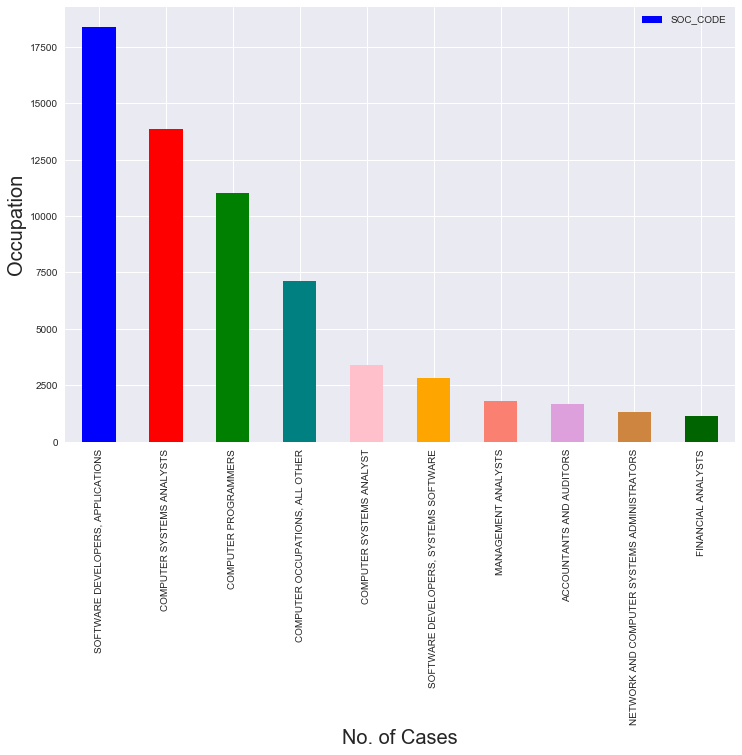

In [12]:
top10occupations = data[['SOC_NAME','SOC_CODE']][(data.CASE_STATUS == 'CERTIFIED') | (data.CASE_STATUS == 'CERTIFIED-WITHDRAWN')].groupby('SOC_NAME').agg('count').sort_values('SOC_CODE',ascending=False).head(10)

top10occupations.plot(kind='bar', color = ['blue','red','green','teal','pink','orange','salmon','plum','peru','darkgreen'])
plt.xlabel('No. of Cases', size=20)
plt.ylabel('Occupation', size=20)
plt.show()

---

## 2. Companies that hire the most Data Scientists

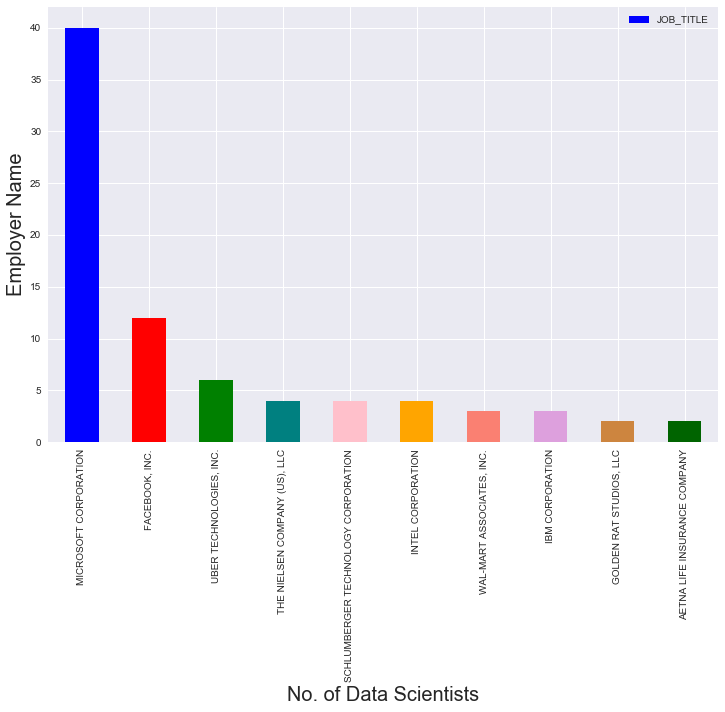

In [13]:
ds = data[['EMPLOYER_NAME','JOB_TITLE']][data.JOB_TITLE == 'DATA SCIENTIST'].groupby('EMPLOYER_NAME').agg('count').sort_values('JOB_TITLE',ascending=False).head(10)
ds.plot(kind='bar', color = ['blue','red','green','teal','pink','orange','salmon','plum','peru','darkgreen'])
plt.xlabel('No. of Data Scientists', size=20)
plt.ylabel('Employer Name', size=20)
plt.show()

---

## 3. Data Scientist - Salary Comparison

In [14]:
avgsalary = data[['JOB_TITLE','PREVAILING_WAGE']].groupby('JOB_TITLE').mean().sort_values('PREVAILING_WAGE',ascending=False)
avgsalary = avgsalary.reset_index()
avgsalary.head(5)

,JOB_TITLE,PREVAILING_WAGE
0,CRITICAL CARE INTENSIVIST,349410.0
1,ANESTHESIOLOGIST MD,337760.0
2,STAFF PHYSICIAN (SURGICAL ONCOLOGY),300600.0
3,"CHAIRMAN, DEPT OF PSYCHIATRY (PROFESSOR)",284211.0
4,PHYSICIAN - MEDICAL ONCOLOGIST/HEMATOLOGIST,283668.0


In [15]:
print('\nA Data Scientist on average earns $%i annually which is %.2f%% higher than the avg salary of $%i for all professions.' %(avgsalary[avgsalary.JOB_TITLE == 'DATA SCIENTIST'].PREVAILING_WAGE,(avgsalary[avgsalary.JOB_TITLE == 'DATA SCIENTIST'].PREVAILING_WAGE-data.PREVAILING_WAGE.mean())*100/data.PREVAILING_WAGE.mean(),data.PREVAILING_WAGE.mean())) 


A Data Scientist on average earns $88646 annually which is 17.05% higher than the avg salary of $75734 for all professions.


---

## 4. Deny Proportionality

In [16]:
visa = pd.merge(left=data,right=states,how='left',on='EMPLOYER_STATE')
visa.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,State,Population_Est
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149,California,39250017.0
1,I-200-10138-949973,CERTIFIED-WITHDRAWN,11-03-16,28-11-16,H-1B,07-09-16,06-09-19,"WEST-CAMP PRESS, INC.",OH,43081,STAFF ACCOUNTANT,13-2011,ACCOUNTANTS AND AUDITORS,323119,45698,Ohio,11614373.0
2,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341,Georgia,10310371.0
3,I-200-11080-460161,CERTIFIED-WITHDRAWN,03-02-15,31-10-16,H-1B,09-02-15,08-02-18,CONOCOPHILLIPS COMPANY,TX,77079,PETROPHYSICIST,19-4041,GEOLOGICAL AND PETROLEUM TECHNICIANS,324110,65520,Texas,27862596.0
4,I-200-12047-839355,CERTIFIED-WITHDRAWN,27-02-15,07-10-16,H-1B,29-08-15,28-08-18,"SUNERA TECHNOLOGIES, INC",MI,48083,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,5415,68578,Michigan,9928301.0


In [18]:
visa = pd.merge(left=visa,right=naics,how='left',on='NAICS_CODE')
visa.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,State,Population_Est,NAICS Title
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149,California,39250017.0,Custom Computer Programming Services
1,I-200-10138-949973,CERTIFIED-WITHDRAWN,11-03-16,28-11-16,H-1B,07-09-16,06-09-19,"WEST-CAMP PRESS, INC.",OH,43081,STAFF ACCOUNTANT,13-2011,ACCOUNTANTS AND AUDITORS,323119,45698,Ohio,11614373.0,Other Commercial Printing
2,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341,Georgia,10310371.0,Custom Computer Programming Services
3,I-200-11080-460161,CERTIFIED-WITHDRAWN,03-02-15,31-10-16,H-1B,09-02-15,08-02-18,CONOCOPHILLIPS COMPANY,TX,77079,PETROPHYSICIST,19-4041,GEOLOGICAL AND PETROLEUM TECHNICIANS,324110,65520,Texas,27862596.0,Petroleum Refineries
4,I-200-12047-839355,CERTIFIED-WITHDRAWN,27-02-15,07-10-16,H-1B,29-08-15,28-08-18,"SUNERA TECHNOLOGIES, INC",MI,48083,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,5415,68578,Michigan,9928301.0,Computer Systems Design and Related Services


In [22]:
denied = visa[['EMPLOYER_STATE','CASE_NUMBER']][visa.CASE_STATUS == 'DENIED'].groupby('EMPLOYER_STATE').agg('count').sort_values('CASE_NUMBER',ascending=False)
denied = denied.reset_index()
denied.head()

,EMPLOYER_STATE,CASE_NUMBER
0,CA,257
1,NY,164
2,TX,106
3,NJ,90
4,PA,77


In [23]:
m = pd.merge(left=denied,right=states,how='outer',on='EMPLOYER_STATE')

m.head()

,EMPLOYER_STATE,CASE_NUMBER,State,Population_Est
0,CA,257.0,California,39250017.0
1,NY,164.0,New York,19745289.0
2,TX,106.0,Texas,27862596.0
3,NJ,90.0,New Jersey,8944469.0
4,PA,77.0,Pennsylvania,12802503.0


In [24]:
m['Prop_to_Population'] = m['CASE_NUMBER']*100/m['Population_Est']

In [25]:
m.head()

,EMPLOYER_STATE,CASE_NUMBER,State,Population_Est,Prop_to_Population
0,CA,257.0,California,39250017.0,0.000655
1,NY,164.0,New York,19745289.0,0.000831
2,TX,106.0,Texas,27862596.0,0.000380
3,NJ,90.0,New Jersey,8944469.0,0.001006
4,PA,77.0,Pennsylvania,12802503.0,0.000601


In [26]:
total_applicants = visa[['EMPLOYER_STATE','CASE_NUMBER']].groupby('EMPLOYER_STATE').agg('count').sort_values('CASE_NUMBER',ascending=False)
total_applicants = total_applicants.reset_index()
total_applicants.head()

,EMPLOYER_STATE,CASE_NUMBER
0,CA,15293
1,TX,12090
2,NJ,11134
3,NY,6606
4,IL,6176


In [27]:
n = pd.merge(m,total_applicants,how='inner',on='EMPLOYER_STATE')
n.head()

,EMPLOYER_STATE,CASE_NUMBER_x,State,Population_Est,Prop_to_Population,CASE_NUMBER_y
0,CA,257.0,California,39250017.0,0.000655,15293
1,NY,164.0,New York,19745289.0,0.000831,6606
2,TX,106.0,Texas,27862596.0,0.000380,12090
3,NJ,90.0,New Jersey,8944469.0,0.001006,11134
4,PA,77.0,Pennsylvania,12802503.0,0.000601,3704


In [28]:
n['Prop_to_Applicants'] = n['CASE_NUMBER_x']*100/n['CASE_NUMBER_y']

In [29]:
n[['State','Prop_to_Population']].sort_values('Prop_to_Population',ascending=False).head()

,State,Prop_to_Population
21,Delaware,0.001260
3,New Jersey,0.001006
1,New York,0.000831
29,Rhode Island,0.000757
8,Massachusetts,0.000705


In [30]:
n[['State','Prop_to_Applicants']].sort_values('Prop_to_Applicants',ascending=False).head()

,State,Prop_to_Applicants
45,NaN,100.000000
16,NaN,22.666667
26,Hawaii,13.043478
43,Montana,11.764706
46,Alaska,8.333333


---

## 5. Industries among the top 5 percentile

In [31]:
top_ind = visa[['NAICS Title','NAICS_CODE']].groupby('NAICS Title').agg('count').sort_values('NAICS_CODE',ascending=False)

In [32]:
top5percentile = np.percentile(a = top_ind.NAICS_CODE, q=95)
top5percentile

157.0

In [33]:
top_ind[top_ind.NAICS_CODE >= top5percentile]

,NAICS_CODE
NAICS Title,
Custom Computer Programming Services,31941
Computer Systems Design and Related Services,6742
Computer Systems Design Services,5311
"Colleges, Universities, and Professional Schools",5298
"Management, Scientific, and Technical Consulting Services",3689
Software Publishers,2640
Other Computer Related Services,1855
Offices of Certified Public Accountants,1476
Engineering Services,1406


---

## 6. Time of Application

In [34]:
d = visa[['CASE_NUMBER','CASE_SUBMITTED','DECISION_DATE']][visa.CASE_STATUS=='DENIED']

In [51]:
d['MONTH_SUBMITTED'] = pd.DatetimeIndex(d.CASE_SUBMITTED).month 
d['DECISION_MONTH'] = pd.DatetimeIndex(d.DECISION_DATE).month
d.head()

,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,MONTH_SUBMITTED,DECISION_MONTH,DAY_SUBMITTED,DECISION_DAY
1881,I-200-14311-284928,20-12-16,22-12-16,12,12,20,20
2533,I-200-15060-565396,29-09-16,03-10-16,9,3,29,29
3556,I-200-15139-183403,05-10-16,07-10-16,5,7,10,10
4179,I-200-15251-717050,12-12-16,14-12-16,12,12,12,12
6754,I-200-16075-799719,15-11-16,17-11-16,11,11,15,15


In [52]:
d['DAY_SUBMITTED'] = pd.DatetimeIndex(d.CASE_SUBMITTED).day 
d['DECISION_DAY'] = pd.DatetimeIndex(d.DECISION_DATE).day
d.head()

,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,MONTH_SUBMITTED,DECISION_MONTH,DAY_SUBMITTED,DECISION_DAY
1881,I-200-14311-284928,20-12-16,22-12-16,12,12,20,22
2533,I-200-15060-565396,29-09-16,03-10-16,9,3,29,10
3556,I-200-15139-183403,05-10-16,07-10-16,5,7,10,10
4179,I-200-15251-717050,12-12-16,14-12-16,12,12,12,14
6754,I-200-16075-799719,15-11-16,17-11-16,11,11,15,17


In [40]:
p1= d[['MONTH_SUBMITTED','CASE_NUMBER']].groupby('MONTH_SUBMITTED').agg('count').sort_values('CASE_NUMBER',ascending=False)
p1 = p1.reset_index()

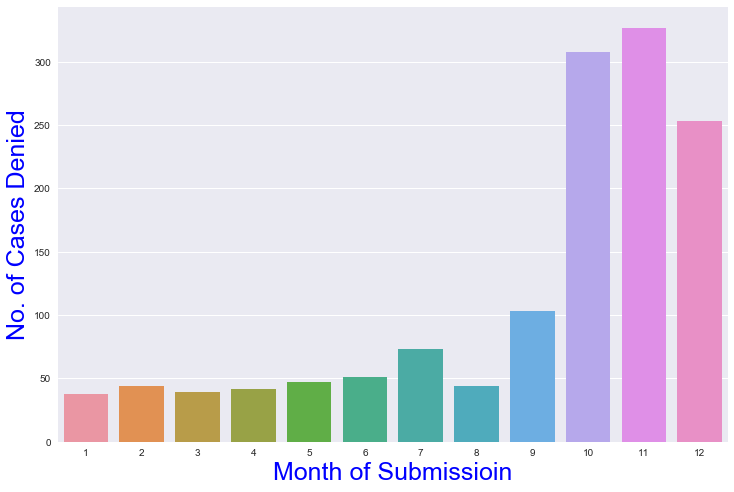

In [46]:
sns.barplot(p1.MONTH_SUBMITTED,p1.CASE_NUMBER,data=p1)
plt.xlabel('Month of Submissioin', fontsize = 25, color = 'Blue')
plt.ylabel('No. of Cases Denied', fontsize = 25, color = 'Blue')
plt.show()

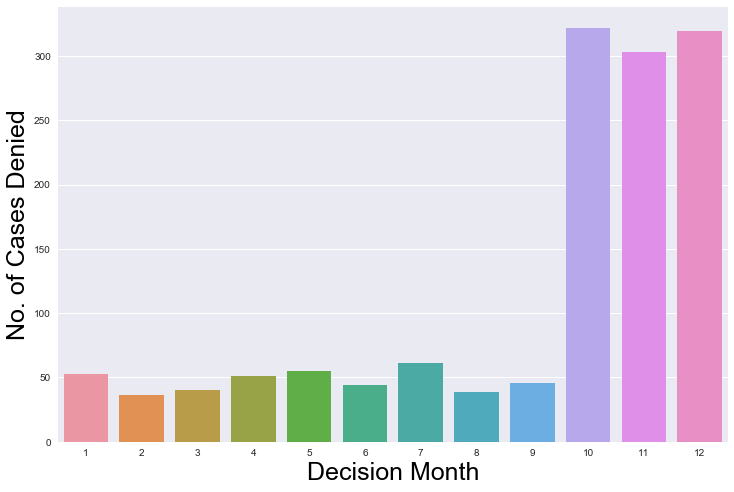

In [57]:
q1= d[['DECISION_MONTH','CASE_NUMBER']].groupby('DECISION_MONTH').agg('count').sort_values('CASE_NUMBER',ascending=False)
q1 = q1.reset_index()

sns.barplot(q1.DECISION_MONTH,q1.CASE_NUMBER,data=q1)
plt.xlabel('Decision Month', fontsize = 25, color = 'Black')
plt.ylabel('No. of Cases Denied', fontsize = 25, color = 'Black')
plt.show()

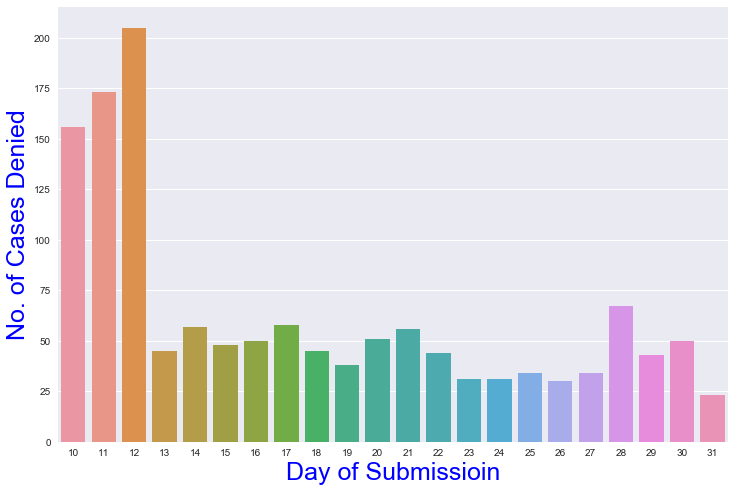

In [56]:
p2 = d[['DAY_SUBMITTED','CASE_NUMBER']].groupby('DAY_SUBMITTED').agg('count').sort_values('CASE_NUMBER',ascending=False).reset_index()
sns.barplot(p2.DAY_SUBMITTED, p2.CASE_NUMBER,data=p2)
plt.xlabel('Day of Submissioin', fontsize = 25, color = 'Blue')
plt.ylabel('No. of Cases Denied', fontsize = 25, color = 'Blue')
plt.show()

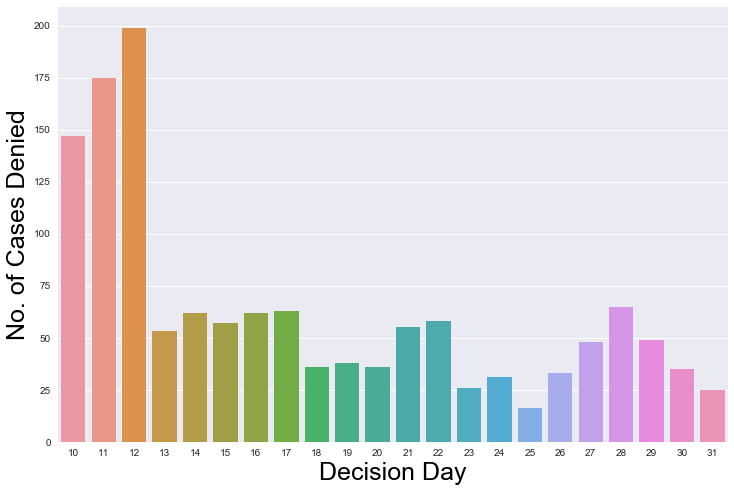

In [55]:
q2 = d[['DECISION_DAY','CASE_NUMBER']].groupby('DECISION_DAY').agg('count').sort_values('CASE_NUMBER',ascending=False).reset_index()
sns.barplot(q2.DECISION_DAY, q2.CASE_NUMBER,data=q2)
plt.xlabel('Decision Day', fontsize = 25, color = 'Black')
plt.ylabel('No. of Cases Denied', fontsize = 25, color = 'Black')
plt.show()